In [1]:
from utils_functions import *

# Loading training and testing data with 100% of conversations content (offline-stage)

In [2]:
# Loading training data 
# Atributes : Conversation - Time start - Number of participants - Label (groomer/non-groomer)
PATH =  "dataBase/train"
df  = pd.read_csv(PATH,encoding='utf-8',header=None)
Xss_train,Xss_train_time,Ys_train = df[0],df[1],df[2]
posis_train = np.argwhere(Ys_train==1)
negis_train = np.argwhere(Ys_train==0)
print('\033[91m')
print("Training data loaded ... Number of conversations: ",len(Xss_train))
print("Groomers Train: ",len(posis_train)," Non-groomers Train: ", len(negis_train))
print("Conversation 1: ",Xss_train[0][:20]," ...")
print("Conversation 1 start time: ",Xss_train_time[0])
print("Conversation 1 label: ",Ys_train[0])
print("*"*50)
print('\033[96m')
# Loading testing data 
# Atributes : Conversation - Time start - Number of participants - Label (groomer/non-groomer)
PATH =  "dataBase/test"
df  = pd.read_csv(PATH,encoding='utf-8',header=None)
Xss_test,Xss_test_time,Ys_test = df[0],df[1],df[2]
posis_test = np.argwhere(Ys_test==1)
negis_test = np.argwhere(Ys_test==0)
print("Testing data loaded ... Number of conversations: ",len(Xss_test))
print("Groomers Test: ",len(posis_test)," Non-groomers Test: ", len(negis_test))
print("Conversation 1: ",Xss_test[0][:20]," ...")
print("Conversation 1 start time: ",Xss_test_time[0])
print("Conversation 1 label: ",Ys_test[0])



Training data loaded ... Number of conversations:  66927
Groomers Train:  2016  Non-groomers Train:  64911
Conversation 1:  Hola. hi. whats up?   ...
Conversation 1 start time:  03:20
Conversation 1 label:  0
**************************************************

Testing data loaded ... Number of conversations:  155128
Groomers Test:  3737  Non-groomers Test:  151391
Conversation 1:  bugmail: [Bug 6978]   ...
Conversation 1 start time:  15:24
Conversation 1 label:  0


# Loading % Interaction words per user BF.

In [3]:
# Loading pre-calculated "Interaction words per user" BF from training set
# This BF indicates, the number of participants (top five) in a given conversation.

Xss_train_participants = loading_pkl("dataSavings/train_participants_.pkl")
print('\033[91m')
print("Training data loaded ... Number of conversations: ",len(Xss_train_participants))
print("In conversation 1 there are: ",Xss_train_participants[0][0]," participants")
print("*"*50)
print('\033[96m')
##########
Xss_test_participants = loading_pkl("dataSavings/participants_matrix.pkl")
# Choosing the last chunk witn 100% of the information; the rest chunks are used for
# the simulation process (Online-stage)
Xss_test_participants = Xss_test_participants[:,9]
print("Testing data loaded ... Number of conversations: ",len(Xss_test_participants))
print("In conversation 1 there are: ",Xss_test_participants[0]," participants")




Training data loaded ... Number of conversations:  66927
In conversation 1 there are:  2.0  participants
**************************************************

Testing data loaded ... Number of conversations:  155128
In conversation 1 there are:  5.0  participants


# Loading % Interaction words per user BF.

In [4]:
# Loading pre-calculated "Interaction words per user" BF from training set
# This BF indicates, in percentage (%), how much each participant interacts in a given conversation.
PATH =  "dataBase/train_interaction_words_user.pkl"
matrix = loading_pkl(PATH)
# Choosing the last chunk witn 100% of the information
matrix = matrix
Xss_train_int_user = np.reshape(matrix,(len(matrix),))
print('\033[91m')
print("Training data loaded ... Number of conversations: ",len(Xss_train_int_user))
print("In conversation 1:")
id = 0
for i in(Xss_train_int_user[0]):
    print("  Participant ",id," interacts ",i*100,"% of the conversation")
    id += 1
print("*"*50)
print('\033[96m')
##########
PATH =  "dataBase/test_early_interaction_words_user.pkl"
matrix = loading_pkl(PATH)

# Choosing the last chunk witn 100% of the information; the rest chunks are used for
# the simulation process (Online-stage)
matrix = matrix[:,[9]]
Xss_test_int_user = np.reshape(matrix,(len(matrix),))
print("Testing data loaded ... Number of conversations: ",len(Xss_test_int_user))
print("In conversation 1:")
id = 0
for i in(Xss_test_int_user[0]):
    print("  Participant ",id," interacts ",i*100,"% of the conversation")
    id += 1



Training data loaded ... Number of conversations:  66927
In conversation 1:
  Participant  0  interacts  55.219780219780226 % of the conversation
  Participant  1  interacts  44.78021978021978 % of the conversation
  Participant  2  interacts  0.0 % of the conversation
  Participant  3  interacts  0.0 % of the conversation
  Participant  4  interacts  0.0 % of the conversation
**************************************************

Testing data loaded ... Number of conversations:  155128
In conversation 1:
  Participant  0  interacts  37.83783783783784 % of the conversation
  Participant  1  interacts  33.108108108108105 % of the conversation
  Participant  2  interacts  12.837837837837837 % of the conversation
  Participant  3  interacts  13.006756756756758 % of the conversation
  Participant  4  interacts  3.209459459459459 % of the conversation


# Pipeline : preprocessing (offline stage)

## Importing somajo Tokenizer to remove noise from data; Oficial repository : https://github.com/tsproisl/SoMaJo¶

In [5]:
nc = tokenizer_Somajo_vectorizer
print('\033[91m')
print("You picked SOMAJO processing")
conversation = "This is a ? testing &apos; conversation :-*"
tokens_clean_conversation = nc(conversation)
print('\033[96m')
print(tokens_clean_conversation)
nc


You picked SOMAJO processing

['this', 'is', 'a', '?', 'testing', 'conversation', ':-*']


<function utils_functions.tokenizer_Somajo_vectorizer(document)>

In [6]:
%%time
"""
    Uncomment if this is the first execution of preprocessing training data
"""

"""
print('\033[91m')
print("Before: ",Xss_train[0])

doc_train,new_Y_train,X_train_time,X_train_participants,X_train_int_user = pre_processing_conversations(nc,Xss_train,Ys_train,Xss_train_time,Xss_train_participants,Xss_train_int_user)
print('\033[94m')

print("Train Documents, There are :",len(doc_train),": ", doc_train[0]," ",len(new_Y_train))
print('\033[92m')
print(len(doc_train)," ",len(new_Y_train)," ",len(X_train_time)," ",len(X_train_participants)," ",len(X_train_int_user))
print("Time: ",X_train_time[0]," #Participants: ",X_train_participants[0]," %Inter: ",X_train_int_user[0])
print("Saving preprocessed data ... ")
train_name = 'dataSavings/train_preprocessed.pkl' 
TRAIN = [doc_train,new_Y_train,X_train_time,X_train_participants,X_train_int_user]
saving_pkl(TRAIN,train_name)
"""


print("The preprocessed training data is already saved in folder 'dataSavings'")

The preprocessed training data is already saved in folder 'dataSavings'
CPU times: user 307 µs, sys: 55 µs, total: 362 µs
Wall time: 1.57 ms


In [7]:
%%time
"""
    Uncomment if this is the first execution of preprocessing testing data
"""

"""
print('\033[91m')
print("Before: ",Xss_test[0])
doc_test,new_Y_test,X_test_time,X_test_participants,X_test_int_user = pre_processing_conversations(nc,Xss_test,Ys_test,Xss_test_time,Xss_test_participants,Xss_test_int_user)
print("Test Documents, There are :",len(doc_test),": ", doc_test[0]," ",len(new_Y_test))
print('\033[92m')
print(len(doc_test)," ",len(new_Y_test)," ",len(X_test_time)," ",len(X_test_participants)," ",len(X_test_int_user))
print("Time: ",X_test_time[0]," #Participants: ",X_test_participants[0]," %Inter: ",X_test_int_user[0])
print("Saving preprocessed data ... ")
test_name = 'dataSavings/test_preprocessed.pkl'
TEST = [doc_test,new_Y_test,X_test_time,X_test_participants,X_test_int_user]
saving_pkl(TEST,test_name)
"""
print("The preprocessed testing data is already saved in folder 'dataSavings'")

The preprocessed testing data is already saved in folder 'dataSavings'
CPU times: user 460 µs, sys: 0 ns, total: 460 µs
Wall time: 377 µs


# Loading already preprocessed data

In [8]:
# Training files

train_name = 'dataSavings/train_preprocessed.pkl' # Not symbols
TRAIN = loading_pkl(train_name)
doc_train,Y_train,X_train_time,X_train_participants,X_train_int_user  = TRAIN[0],TRAIN[1],TRAIN[2],TRAIN[3],TRAIN[4]
Y_train = np.asarray(Y_train)
X_train_participants = np.asarray(X_train_participants)
X_train_int_user = np.asarray(X_train_int_user)
posi_train = np.argwhere(Y_train==1)
nega_train = np.argwhere(Y_train==0)


# Testing files
test_name = 'dataSavings/test_preprocessed.pkl' # Not symbols
TEST = loading_pkl(test_name)
doc_test,Y_test,X_test_time,X_test_participants,X_test_int_user = TEST[0],TEST[1],TEST[2],TEST[3],TEST[4]
Y_test = np.asarray(Y_test)
X_test_participants = np.asarray(X_test_participants)
X_test_participants = np.expand_dims(X_test_participants, axis=1)
X_test_int_user = np.asarray(X_test_int_user)
posi_test  = np.argwhere(Y_test==1)
nega_test  = np.argwhere(Y_test==0)

print("Empty conversations were removed in preprocessing process")
print("Before precessing Train Groomers: ",len(posis_train), " After: ",len(posi_train), "Lost: ",len(posis_train)-len(posi_train))
print("Before precessing Test Groomers: ",len(posis_test), " After: ",len(posi_test), "Lost: ",len(posis_test)-len(posi_test))


Empty conversations were removed in preprocessing process
Before precessing Train Groomers:  2016  After:  2015 Lost:  1
Before precessing Test Groomers:  3737  After:  3724 Lost:  13


# Starting with the PSR ++ method

In [9]:
%%time
vocabulary = calculating_vocabulary(doc_train)
print("Vocabulary: ",len(vocabulary))

Vocabulary:  45845
CPU times: user 1.97 s, sys: 4.07 ms, total: 1.97 s
Wall time: 1.99 s


In [10]:
%%time
"""
    Uncomment if this is the first execution of DF calculation process
"""
"""
DF = calculated_df(doc_train,vocabulary)
saving_pkl(DF,"dataSavings/df")
"""
DF = loading_pkl("dataSavings/df")
print("Number of documents with token :-*: ",DF[":-*"])

Number of documents with token :-*:  415
CPU times: user 13.7 ms, sys: 0 ns, total: 13.7 ms
Wall time: 18.1 ms


In [11]:
%%time
# PSR weights files
"""
    Uncomment if this is the first execution of PSR weights calculation process
"""
"""
psr_weights = PSR_weight_schema(doc_train,Y_train,vocabulary,DF)
saving_pkl(psr_weights,'dataSavings/psr.pkl')
"""
psr_weights = loading_pkl('dataSavings/psr.pkl')
print(len(psr_weights))

45845
CPU times: user 92.4 ms, sys: 3.4 ms, total: 95.8 ms
Wall time: 118 ms


# Performing the PSR++ method with the training data
## The psr++ method contain fundamental modifications to the original PSR method

In [12]:
%%time
DR = PSR_plus_document_representation(doc_train,psr_weights)
print('\033[91m')
DR = np.reshape(DR,(len(DR),2))
print(DR.shape)
print("Training set ...")
print("Now each training document is represent in a vector space of size 2 (groomer and non-groomer)")
#plotting(DR,Y_train)


(66914, 2)
Training set ...
Now each training document is represent in a vector space of size 2 (groomer and non-groomer)
CPU times: user 12.8 s, sys: 20.5 ms, total: 12.8 s
Wall time: 12.9 s


In [13]:
%%time
DRT = PSR_plus_document_representation(doc_test,psr_weights)
print('\033[94m')
DRT = np.reshape(DRT,(len(DRT),2))
print(DRT.shape)

print("Testing set ...")
print("Now each testing document is represent in a vector space of size 2 (groomer and non-groomer)")
#plotting(DRT,Y_test)


(155101, 2)
Testing set ...
Now each testing document is represent in a vector space of size 2 (groomer and non-groomer)
CPU times: user 30.5 s, sys: 70.9 ms, total: 30.6 s
Wall time: 31.1 s


# Pipeline : Calculating proposed Behavioral Features

# Time when a conversation starts BF

In [14]:
"""
    Uncomment if this is the first execution of Time when a conversation starts BF
"""


"""
print("Time when a conversation starts BF")
n_features = 2 # Hours (HH) : Minutes (MM)
time_bf_train = calculating_time(X_train_time,n_features)
time_bf_test = calculating_time(X_test_time,n_features)
print("time_bf_train: ",time_bf_train.shape," time_bf_test: ",time_bf_test.shape)
print('\033[91m')
print("First time registered in the training set: ",X_train_time[0])
print("First time registered in the training set after normalization: ",time_bf_train[0])
print('\033[96m')
print("First time registered in the testing set: ",X_test_time[0])
print("First time registered in the testing set after normalization: ",time_bf_test[0])
# Saving calculations
time_bf = (time_bf_train,time_bf_test)
saving_pkl(time_bf,"dataSavings/time_bf.pkl")
"""
# Loading calculations
time_bf = loading_pkl("dataSavings/time_bf.pkl")

print("Loading pre-saved BF from 'dataSavings' folder ... ")

Loading pre-saved BF from 'dataSavings' folder ... 


# Correctly spelled words BF

In [15]:
"""
    Uncomment if this is the first execution of Correctly spelled words BF
"""

"""
print("Correctly spelled words BF")
train_csw = calculating_CSW(doc_train)
test_csw = calculating_CSW(doc_test)
print("train_tw: ",train_csw.shape," test_tw: ",test_csw.shape)
print('\033[91m')
print("% of Correctly spelled words in training conversation 1) : ",train_csw[0][0]*100)
print('\033[96m')
print("% of Correctly spelled words in testing conversation 1) : ",test_csw[0][0]*100)
# Saving calculations
correctly_bf = (train_csw,test_csw)
saving_pkl(correctly_bf,"dataSavings/correctly_bf.pkl")
"""
# Loading calculations
correctly_bf = loading_pkl("dataSavings/correctly_bf.pkl")
print("Loading pre-saved BF from 'dataSavings' folder ... ")

Loading pre-saved BF from 'dataSavings' folder ... 


# Sexual topic words BF 

In [16]:
print("Loading pre-calculated extended list of sexual words with fastText library")
sexual_words = loading_pkl("dataBase/augmented_sexual_words.pkl")
print("Sexual words extended list: ",len(sexual_words))

"""
    Uncomment if this is the first execution of Sexual topic words BF
"""

"""
sexual_train = calculating_sexual_words(sexual_words, doc_train)
sexual_test = calculating_sexual_words(sexual_words, doc_test)
print("sexual_train: ",sexual_train.shape," sexual_test: ",sexual_test.shape)
print('\033[91m')
print("% of Sexual topic words in training conversation 1) : ",sexual_train[0][0]*100)
print('\033[96m')
print("% of Sexual topic words in testing conversation 1) : ",sexual_test[0][0]*100)
# Saving calculations
sexual_bf = (sexual_train,sexual_test)
saving_pkl(sexual_bf,"dataSavings/sexual_bf.pkl")
"""
# Loading calculations
sexual_bf = loading_pkl("dataSavings/sexual_bf.pkl")
print("Loading pre-saved BF from 'dataSavings' folder ... ")

Loading pre-calculated extended list of sexual words with fastText library
Sexual words extended list:  506
Loading pre-saved BF from 'dataSavings' folder ... 


# NRC sentiment and emotional markers BF

In [17]:
# Loading NRC lexicon
print("NRC emotional markers")
nrc_emotions = loading_pkl("dataBase/emotions_nrc.pkl")    

"""
    Uncomment if this is the first execution of NRC emotional markers BF
""" 

"""
n_emo = 10 # NRC lexicon has 10 (8 emotions + 2 sentiments)
nrc_emo_train = calculating_emotional_markers(nrc_emotions, doc_train,n_emo)
nrc_emo_test = calculating_emotional_markers(nrc_emotions, doc_test,n_emo)
# Choosing the most significative ones
nrc_emo_train = nrc_emo_train[:, [0,1,4,6,7,8]]
nrc_emo_test = nrc_emo_test[:, [0,1,4,6,7,8]]
print("nrc_emo_train: ",nrc_emo_train.shape," nrc_emo_test",nrc_emo_test.shape)
print('\033[91m')
print("% of Anticipation in training conversation 1) : ",nrc_emo_train[0][0]*100)
print('\033[96m')
print("% of Anticipation in testing conversation 1) : ",nrc_emo_test[0][0]*100)
# Saving calculations
nrc_bf = (nrc_emo_train,nrc_emo_test)
saving_pkl(nrc_bf,"dataSavings/nrc_bf.pkl")
"""

# Loading calculations
nrc_bf = loading_pkl("dataSavings/nrc_bf.pkl")
print("Loading pre-saved BF from 'dataSavings' folder ... ")

NRC emotional markers
Loading pre-saved BF from 'dataSavings' folder ... 


# Depeche emotional markers BF

In [18]:
# Loading Depeche lexicon
print("Depeche emotional markers")
depeche_emotions_lexicon = loading_pkl("dataBase/emotions_depeche.pkl" )

# Converting vector of weights in binary terms (1/0), max values turns 1, otthers 0
depeche_emotions = processing_depeche_lexicon(depeche_emotions_lexicon)

"""
    Uncomment if this is the first execution of Depeche emotional markers BF
"""

"""
n_emo = 8 # Depeche lexicon has 8 emotions
de_emo_train = calculating_emotional_markers(depeche_emotions, doc_train,n_emo)
de_emo_test = calculating_emotional_markers(depeche_emotions, doc_test,n_emo)


# Choosing the most significative ones
de_emo_train = de_emo_train[:, [1,2,6,7]] 
de_emo_test = de_emo_test[:, [1,2,6,7]] 
print("dee_emo_train :",de_emo_train.shape," dee_emo_test:",de_emo_test.shape)
print('\033[91m')
print("% of Inspired in training conversation 1) : ",de_emo_train[0][2]*100)
print('\033[96m')
print("% of Inspired in testing conversation 1) : ",de_emo_test[0][2]*100)
# Saving calculations
depeche_bf = (de_emo_train,de_emo_test)
saving_pkl(depeche_bf,"dataSavings/depeche_bf.pkl")
"""

# Loading calculations
depeche_bf = loading_pkl("dataSavings/depeche_bf.pkl")
print("Loading pre-saved BF from 'dataSavings' folder ... ")

Depeche emotional markers
Loading pre-saved BF from 'dataSavings' folder ... 


# Emoticons BF

In [19]:
"""
    Uncomment if this is the first execution of Emoticons BF
"""

print("Emoticons")

"""
emoticons_list = list()
emoticon_train,emoticons_list = calculating_emoticons_set(doc_train,emoticons_list)
print("emoticons_list: ",len(emoticons_list))
emoticon_test,emoticons_list = calculating_emoticons_set(doc_test,emoticons_list)
print("emoticons_list: ",len(emoticons_list))
emoticons_set = set(emoticons_list)
print("emoticons_set: ",len(emoticons_set))
print("emoticon_train :",emoticon_train.shape," emoticon_test:",emoticon_test.shape)
print('\033[91m')
print("% of Emoticons in training conversation 1) : ",emoticon_train[0][0]*100)
print('\033[96m')
print("% of Emoticons in testing conversation 1) : ",emoticon_test[0][0]*100)
# Saving calculations
emoticons_bf = (emoticon_train,emoticon_test)
saving_pkl(emoticons_bf,"dataSavings/emoticons_bf.pkl")
saving_pkl(emoticons_set,"dataBase/emoticons_set.pkl")
"""

# Loading calculations
emoticons_bf = loading_pkl("dataSavings/emoticons_bf.pkl")
emoticons_set = loading_pkl("dataBase/emoticons_set.pkl")
print("Loading pre-saved BF from 'dataSavings' folder ... ")


Emoticons
Loading pre-saved BF from 'dataSavings' folder ... 


# Saving all the proposed BFs in a list

In [20]:
# Obtaing the pre-calculated BF : Number of participants BF and Interections words per user BF
participants_bf = (X_train_participants,X_test_participants)
interactions_bf = (X_train_int_user,X_test_int_user)
BFS = [participants_bf,interactions_bf,depeche_bf,emoticons_bf,correctly_bf,time_bf,sexual_bf,nrc_bf]
print("There are: ",len(BFS)," Behavioral Features")

There are:  8  Behavioral Features


# Performing BF-PSR method : Training model (offline-stage)

In [21]:
print('\033[91m')
print("Performing BF-PSR method")
#labels_BFS = ["Time when a conversation starts","Correctly spelled words","Sexual topic words","NRC emotions","Depeche emotions","Emoticons","Number of participants","Interaction words per user"]
labels_BFS = ["Number of participants","Interaction words per user","Depeche emotions","Emoticons","Correctly spelled words","Time when a conversation starts","Sexual topic words","NRC emotions",]
f1_g, model = BF_PSR(DR,DRT,Y_train,Y_test,BFS,labels_BFS,8)
print('\033[94m')
print("F1 mesure of the positive class: ",f1_g * 100, "% with 100% of the information")


Performing BF-PSR method
0 ) Stacking  Number of participants  BF of shape:  (66914, 1)
1 ) Stacking  Interaction words per user  BF of shape:  (66914, 5)
2 ) Stacking  Depeche emotions  BF of shape:  (66914, 4)
3 ) Stacking  Emoticons  BF of shape:  (66914, 1)
4 ) Stacking  Correctly spelled words  BF of shape:  (66914, 1)
5 ) Stacking  Time when a conversation starts  BF of shape:  (66914, 2)
6 ) Stacking  Sexual topic words  BF of shape:  (66914, 1)
7 ) Stacking  NRC emotions  BF of shape:  (66914, 6)
The final PF-PSR vector is of shape:  (66914, 23)   (155101, 23)

F1 mesure of the positive class:  73.0 % with 100% of the information


# Pipeline: (Online-stage)
## Perfoming predictions with partial data : Simulating uncoming messages

In [22]:
%%time
"""
    Uncomment if pre_processing_chunks folder is empty, it may take a while ...
"""
retains = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
#pre_processing_chunks(nc,retains,Ys_test,Xss_test_time)
print("Check if the folder /pre_processing_chunks is empty, if it is: compile the comment line, it may take a while")

----------------------  0.1  ----------------------
(155128,)
(155128,)   (155128, 1)   (155128, 1)
Test Documents, There are : 124017   124017

----------------------  0.2  ----------------------
(155128,)
(155128,)   (155128, 1)   (155128, 1)
Test Documents, There are : 151732   151732

----------------------  0.3  ----------------------
(155128,)
(155128,)   (155128, 1)   (155128, 1)
Test Documents, There are : 153304   153304

----------------------  0.4  ----------------------
(155128,)
(155128,)   (155128, 1)   (155128, 1)
Test Documents, There are : 153306   153306

----------------------  0.5  ----------------------
(155128,)
(155128,)   (155128, 1)   (155128, 1)
Test Documents, There are : 153310   153310

----------------------  0.6  ----------------------
(155128,)
(155128,)   (155128, 1)   (155128, 1)
Test Documents, There are : 155101   155101

----------------------  0.7  ----------------------
(155128,)
(155128,)   (155128, 1)   (155128, 1)
Test Documents, There are : 15

In [23]:
def simulation(model,percentages,labels_BF,num_BF):
    f1_l = []
    for percentage in range(len(percentages)):
        # Obtaining x% of the conversations already preprocessed 
        print("Obtaining preprocessed conversations with: ",(percentage+1) * 10, "% of information available")
        chunk_information = loading_pkl("Pre_pro_chunks/chunk_preprocessed_"+str(percentage))
        doc_partial,Y_partial,X_time_partial,X_participants_partial,X_int_user_partial  = chunk_information
        Y_partial = np.asarray(Y_partial)
        print("Therea are ",len(doc_partial)," conversations with ",percentages[percentage] * 100," % of information available")
        
        # Obtaining the partial profiles with the PSR++ method
        DRT_partial = PSR_plus_document_representation(doc_partial,psr_weights)
        print("  ",DRT_partial.shape)
        
        # Calculating proposed BF with partial information
        '''Time when a conversation starts BF'''
        print("Calculating: Time when a conversation starts BF ...")
        time_partial = calculating_time(X_time_partial,2)
        print("  ",time_partial.shape)
        
        '''Correctly spelled words BF'''
        print("Calculating: Correctly spelled words BF ...")
        csw_partial = calculating_CSW(doc_partial)
        print("  ",csw_partial.shape)
        
        '''Sexual topic words BF'''
        print("Calculating: Sexual topic words BF ...")
        sexual_partial = calculating_sexual_words(sexual_words, doc_partial)
        print("  ",sexual_partial.shape)
        
        '''NRC emotional markers BF'''
        print("Calculating: NRC emotional markers BF ...")
        nrc_partial = calculating_emotional_markers(nrc_emotions, doc_partial,10)
        nrc_partial = nrc_partial[:, [0,1,4,6,7,8]]
        print("  ",nrc_partial.shape)

        '''Depeche emotional markers BF'''
        print("Calculating: Depeche emotional markers BF ...")
        de_partial = calculating_emotional_markers(depeche_emotions, doc_partial,8)
        de_partial = de_partial[:, [1,2,6,7]]
        print("  ",de_partial.shape)
        
        '''Emoticons BF'''
        print("Calculating: Emoticons BF ...")
        emoticon_partial = calculating_emoticons_faster(emoticons_set, doc_partial)
        print("  ",emoticon_partial.shape)
        
        '''Number of participants BF'''
        print("Calculating: Number of participants BF ...")
        participants_partial = np.asarray(X_participants_partial)
        print("  ",participants_partial.shape)

        '''% Word interactions per user BF'''
        print("Calculating: Word interactions per user BF ...")
        int_user_partial = column_extract(X_int_user_partial)
        print("  ",int_user_partial.shape)
        
        '''Putting toguether all proposed BFs'''
        BFS = [participants_partial,int_user_partial,de_partial,emoticon_partial,csw_partial,time_partial,sexual_partial,nrc_partial]
        
        '''Performing early predictions with partial information'''
        f1_g = BF_PSR_predictions(model,DRT_partial,Y_partial,BFS,labels_BF,num_BF)
        f1_l.append(f1_g)
        print("F1 groomer: ",f1_g)
        print("*"*50)

    return f1_l
        

In [24]:
retains = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
f1_l = simulation(model,retains,labels_BFS,8)
print("List of F1_g results: ",f1_l)

Obtaining preprocessed conversations with:  10 % of information available
Therea are  124017  conversations with  10.0  % of information available
   (124017, 2)
Calculating: Time when a conversation starts BF ...
   (124017, 2)
Calculating: Correctly spelled words BF ...
   (124017, 1)
Calculating: Sexual topic words BF ...
   (124017, 1)
Calculating: NRC emotional markers BF ...
   (124017, 6)
Calculating: Depeche emotional markers BF ...
   (124017, 4)
Calculating: Emoticons BF ...
   (124017, 1)
Calculating: Number of participants BF ...
   (124017, 1)
Calculating: Word interactions per user BF ...
   (124017, 5)
0 ) Stacking  Number of participants  BF
1 ) Stacking  Interaction words per user  BF
2 ) Stacking  Depeche emotions  BF
3 ) Stacking  Emoticons  BF
4 ) Stacking  Correctly spelled words  BF
5 ) Stacking  Time when a conversation starts  BF
6 ) Stacking  Sexual topic words  BF
7 ) Stacking  NRC emotions  BF
The final BF-PSR vector is of size:  (124017, 23)
F1 groomer:  0.5

# Plotting the F1 mesure of tha groomer class 

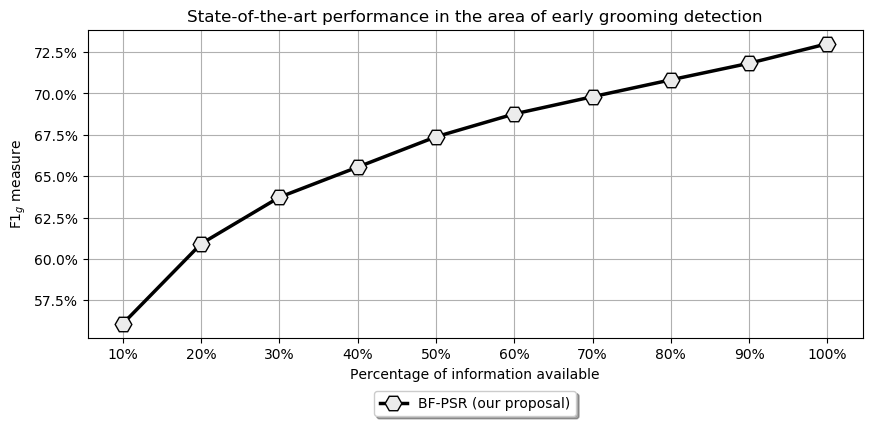

In [25]:
f1_list = f1_l.copy()
plotting_bf_psr(f1_list)

In [1]:

print()